# MOVIE INDUSTRY ANALYSIS
---
## IMPORT LIBRARIES

In [1]:
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from scipy.stats import stats
from scipy.stats import ttest_ind
from scipy.stats import sem
from scipy.stats import linregress
from scipy.stats import f_oneway
from sklearn import datasets
import datetime as datetime64 
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Specifying file paths
imdb_data = "Resource/imdb-movies-dataset.csv"
top500_data = "Resource/top-500-movies.csv"

#Reading all data into Pandas
imdb_data_df = pd.read_csv(imdb_data)
top500_data_df = pd.read_csv(top500_data)

In [3]:
#Merge dataframes using "Title"
merge_movie_df = pd.merge(top500_data_df, imdb_data_df, how='left', on='Title')
merge_movie_df

,rank,release_date,Title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,...,Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,...,"Action, Adventure, Drama",8.4,78.0,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...","1,269,206",After the devastating events ofAvengers: Infin...,"6,933",The End of an Era!,"After Avengers Infinity War, we waited for the..."
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,...,"Action, Adventure, Fantasy",6.6,45.0,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...","565,199",Jack Sparrow and Barbossa embark on a quest to...,425,Our favorite pirate is back!,"Firstly, this review does not contain any spoi..."
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,...,"Action, Adventure, Sci-Fi",7.3,66.0,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","923,438",When Tony Stark and Bruce Banner try to jump-s...,929,Felt so bland,Everything seems so bland. The constant jibe o...
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,...,"Action, Adventure, Sci-Fi",8.4,68.0,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...","1,206,488",The Avengers and their allies must be willing ...,"3,434",The amount of people that don't understand the...,All the reviews that say this movie has no plo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,...,"Adventure, Drama, History",6.8,NaN,John Wayne,"John Wayne, Richard Widmark, Laurence Harvey, ...","17,767","In 1836, a small band of soldiers sacrifice th...",129,"If You Really Want to Know John Wayne, See Thi...",Corny? At times long-winded and stilted? Touch...
546,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,...,"Drama, History, War",6.0,47.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton, Emilio Echev...","22,333",Based on the 1836 standoff between a group of ...,256,Surprised at the negative reviews,I've rarely been as surprised by the reviews I...
547,498,1995-12-22,Cutthroat Island,/movie/Cutthroat-Island#tab=summary,92000000,10017322,18517322,2371415.0,PG-13,Adventure,...,"Action, Adventure, Comedy",5.7,37.0,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...","30,609",A female pirate and her companion race against...,206,Just a good movie to relax to.,Cutthroat Island is a movie that you can just ...
548,499,2013-12-19,The Secret Life of Walter Mitty,/movie/Secret-Life-of-Walter-Mitty-The-(2012)#...,91000000,58236838,187861183,12765508.0,PG,Adventure,...,"Adventure, Comedy, Drama",7.3,54.0,Ben Stiller,"Ben Stiller, Kristen Wiig, Jon Daly, Kathryn Hahn","341,524",When both he and a colleague are about to lose...,666,To see the world. To find each other and to fe...,"I saw an advanced screening of ""The Secret Lif..."


In [4]:
#Narrow dataframe down to only columns needed and rename columns
selected_columns = ['Title', 'Duration (min)', 'Rating', 'Director', 'Cast', 'release_date', 'production_cost', 'worldwide_gross', 'opening_weekend', 'mpaa', 'genre']

movie_sub_df = merge_movie_df[selected_columns]

movie_sub_df.head()

,Title,Duration (min),Rating,Director,Cast,release_date,production_cost,worldwide_gross,opening_weekend,mpaa,genre
0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,2015-12-16,306000000,2064615817,247966675.0,PG-13,Adventure
4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action


In [5]:
#Rename columns
movie_sub_df=movie_sub_df.rename(columns=
                      {'release_date': 'Release Date', 
                       'production_cost': 'Production Cost', 
                       'worldwide_gross': 'Worldwide Gross', 
                       'opening_weekend': 'Opening Weekend', 
                       'mpaa': 'MPAA', 
                       'genre': 'Genre'})
movie_sub_df.head()

,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,2015-12-16,306000000,2064615817,247966675.0,PG-13,Adventure
4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action


In [6]:
# Drop rows with empty cells
movie_clean_df=movie_sub_df.dropna()
movie_clean_df

,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action
6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller",2017-11-13,300000000,655945209,93842239.0,PG-13,Action
...,...,...,...,...,...,...,...,...,...,...,...
544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney, Sebastian Koch, Ma...",2013-02-06,92000000,304249198,24834845.0,R,Action
545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark, Laurence Harvey, ...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton, Emilio Echev...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure


In [7]:
# Export clean df as csv in Resources folder for communal access
movie_clean_df.to_csv("Resource/movie_clean.csv", index_label='Rank')

## LOAD THE CSV FILE INTO A DATAFRAME

In [8]:
clean_data = "Resource/movie_clean.csv"
clean_data_df = pd.read_csv(clean_data)
clean_data_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller",2017-11-13,300000000,655945209,93842239.0,PG-13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
455,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney, Sebastian Koch, Ma...",2013-02-06,92000000,304249198,24834845.0,R,Action
456,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark, Laurence Harvey, ...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
457,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton, Emilio Echev...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
458,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure


## PROFIT MARGIN VS. IMDB RATING

Correlation coefficient (r): 0.38
Probability value (p): 4.818111598768967e-17


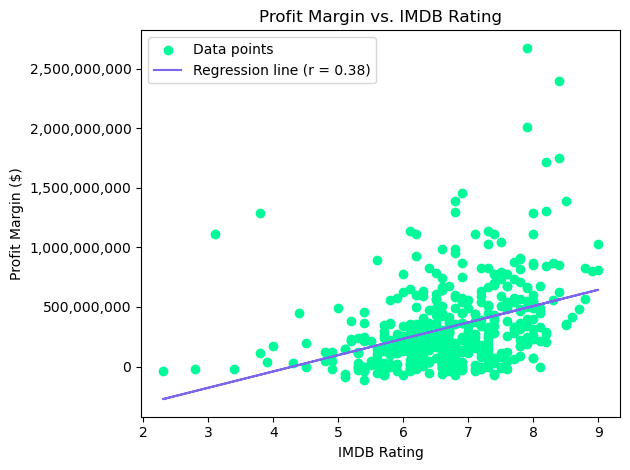

In [9]:
# Calculate Profit Margin
clean_data_df['Profit Margin'] = clean_data_df['Worldwide Gross'] - clean_data_df['Production Cost']

# Perform linear regression using scipy
rating = clean_data_df['Rating']
profit_margin_1 = clean_data_df['Profit Margin']
slope, intercept, r_value, p_value, std_err = linregress(rating, profit_margin_1)

# Calculate the regression line values
regression_line = slope * rating + intercept

# Print the r_value and p_value
print(f'Correlation coefficient (r): {r_value:.2f}')
print(f'Probability value (p): {p_value}')

# Plotting
plt.scatter(rating, profit_margin_1, color='mediumspringgreen', label='Data points')
plt.plot(rating, regression_line, color='mediumslateblue', label=f'Regression line (r = {r_value:.2f})')
plt.xlabel('IMDB Rating')
plt.ylabel('Profit Margin ($)')
plt.title('Profit Margin vs. IMDB Rating')
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))
plt.tight_layout()

#Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/profitvrating.png")
plt.show()

## OPENING WEEKEND BY SEASON

<Figure size 1000x600 with 0 Axes>

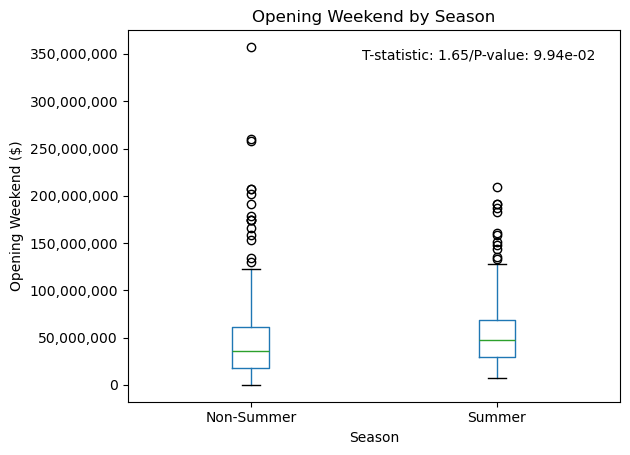

T-statistic: 1.65
P-value: 0.10


In [10]:
# Convert 'Release Date' to datetime
clean_data_df['Release Date'] = pd.to_datetime(clean_data_df['Release Date'])

# Define the summer months
summer_months = [5, 6, 7, 8, 9]

# Categorize 'Release Date' into 'Summer' and 'Non-Summer'
clean_data_df['Season'] = np.where(clean_data_df['Release Date'].dt.month.isin(summer_months), 'Summer', 'Non-Summer')

# Independent t-test
summer_data = clean_data_df[clean_data_df['Season'] == 'Summer']['Opening Weekend']
non_summer_data = clean_data_df[clean_data_df['Season'] == 'Non-Summer']['Opening Weekend']
t_stat, p_val = ttest_ind(summer_data, non_summer_data, equal_var=False)

# Box plot for visualization
plt.figure(figsize=(10, 6))
clean_data_df.boxplot(column='Opening Weekend', by='Season', grid=False)
plt.text(0.95, 0.95, f'T-statistic: {t_stat:.2f}/P-value: {p_val:.2e}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
plt.title('Opening Weekend by Season')
plt.suptitle('')
plt.xlabel('Season')
plt.ylabel('Opening Weekend ($)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))
plt.tight_layout()
#Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/openingbyseason.png")
plt.show()

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_val:.2f}')

## DURATION VS. IMDB RATING

Correlation coefficient (r): 0.29
Probability value (p): 3.1715124317141453e-10


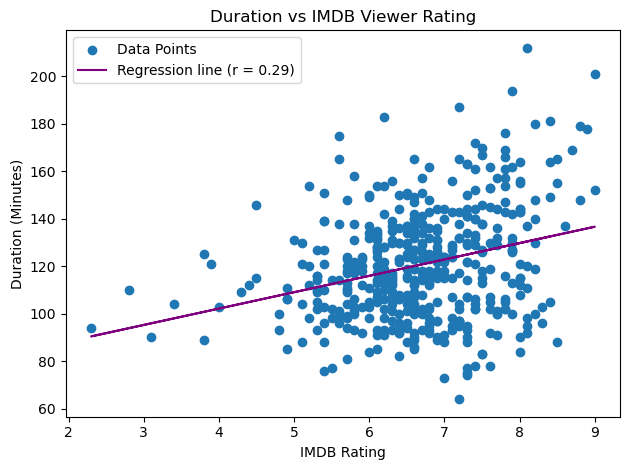

In [11]:
#Assign values for rating and duration
rating = clean_data_df['Rating']
duration = clean_data_df['Duration (min)']
#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(rating, duration)

# Regression line values
regression_line = slope * rating + intercept
# Calculate the regression line values
print(f'Correlation coefficient (r): {r_value:.2f}')
#Print p-value
print(f'Probability value (p): {p_value}')

# Created scatter plot
plt.scatter(rating, duration, label = 'Data Points')
plt.plot(rating, regression_line, color='purple', label=f'Regression line (r = {r_value:.2f})')
plt.xlabel('IMDB Rating')
plt.ylabel('Duration (Minutes)')
plt.title('Duration vs IMDB Viewer Rating')
plt.tight_layout()
plt.legend()
plt.savefig("movie_analysis_visualizations/durationvrating.png")
plt.show()

## DURATION VS. WORLDWIDE SALES

Correlation coefficient (r): 0.21
Probability value (p): 6.797862979761532e-06


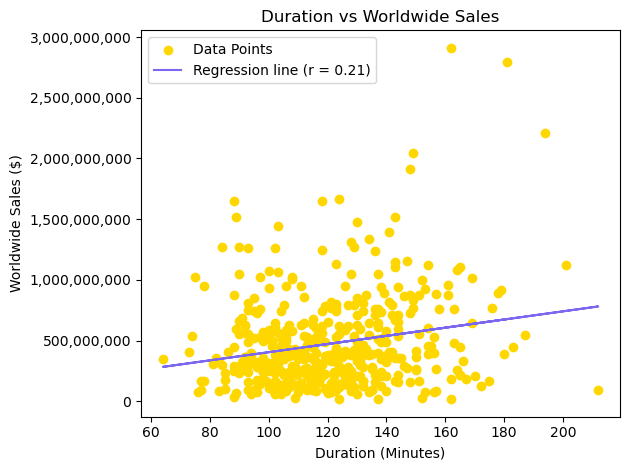

In [12]:
#Assign Values for duration and worldwide gross
duration = clean_data_df['Duration (min)']
worldwide_gross = clean_data_df['Worldwide Gross']

#Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(duration, worldwide_gross)
# Calculate regression line values
regression_line = slope * duration + intercept
# Calculate the regression line values
print(f'Correlation coefficient (r): {r_value:.2f}')

#Print p-value
print(f'Probability value (p): {p_value}')

#Create Scatter Plot
plt.scatter(duration, worldwide_gross, color='gold', label ='Data Points')
plt.plot(duration, regression_line, color ='mediumslateblue', label=f'Regression line (r = {r_value:.2f})')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Worldwide Sales ($)')
plt.title ('Duration vs Worldwide Sales')
#Change into numbers with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))
plt.tight_layout()
plt.legend()
plt.savefig("movie_analysis_visualizations/durationvsales.png")
plt.show()

## OPENING WEEKEND SALES VS. WORLDWIDE SALES

In [13]:
# Assign Values and change to numeric values
worldwide_gross = clean_data_df['Worldwide Gross']
opening_weekend = clean_data_df['Opening Weekend']
production_cost = clean_data_df['Production Cost']
worldwide_gross = pd.to_numeric(worldwide_gross, errors='coerce')
opening_weekend = pd.to_numeric(opening_weekend, errors='coerce')
production_cost = pd.to_numeric(production_cost, errors='coerce')

Probability value (p): 1.1732375158209335e-107


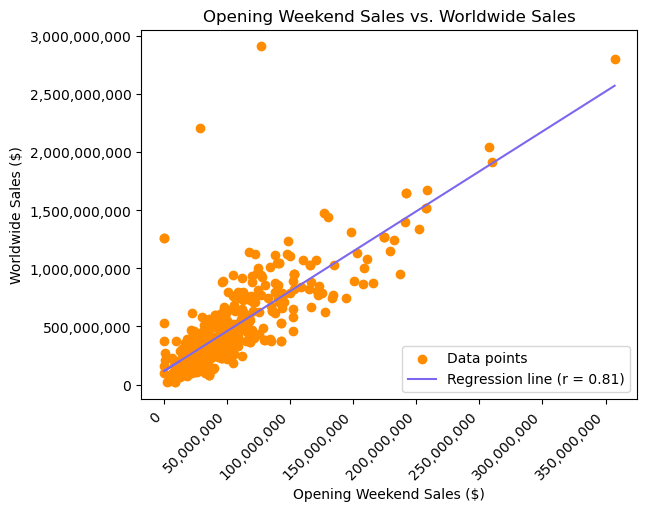

In [14]:
# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = linregress(opening_weekend, worldwide_gross)
# Calculate the regression line values
regression_line = slope * opening_weekend + intercept
#Print p-value
print(f'Probability value (p): {p_value}')
# Plot the scatter plot
plt.scatter(opening_weekend, worldwide_gross, color='darkorange', label='Data points')
plt.plot(opening_weekend, regression_line, color='mediumslateblue', label=f'Regression line (r = {r_value:.2f})')
# Add titles and labels
plt.title('Opening Weekend Sales vs. Worldwide Sales')
plt.xlabel('Opening Weekend Sales ($)')
plt.ylabel('Worldwide Sales ($)') 
# Change format of axis to show whole numbers with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add legend
plt.legend()
# Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/openingvworldwide.png", bbox_inches='tight')
# Show the plot
plt.show()

## PRODUCTION COST VS. WORLDWIDE SALES

Probability value (p): 3.286247452168757e-38


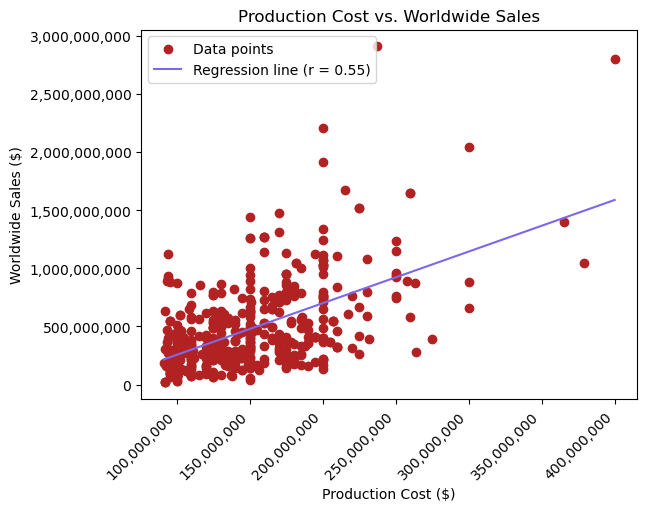

In [15]:
# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = linregress(production_cost, worldwide_gross)
# Calculate the regression line values
regression_line1 = slope * production_cost + intercept
#Print p-value
print(f'Probability value (p): {p_value}')
# Plot the scatter plot
plt.scatter(production_cost, worldwide_gross, color='firebrick', label='Data points')
plt.plot(production_cost, regression_line1, color='mediumslateblue', label=f'Regression line (r = {r_value:.2f})')
# Add titles and labels
plt.title('Production Cost vs. Worldwide Sales')
plt.xlabel('Production Cost ($)')
plt.ylabel('Worldwide Sales ($)') 
# Change format of axis to show whole numbers with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add legend
plt.legend()
# Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/costvsales.png", bbox_inches='tight')
# Show the plot
plt.show()

## GENRE VS. PROFIT MARGIN

In [16]:
# Create a fresh copy of clean_data_df to avoid carryover from previous operations
profit_margin_df = clean_data_df.copy()

# Drop all columns except worldwide sales, production cost, and genre
profit_margin_df = profit_margin_df[['Worldwide Gross', 'Production Cost', 'Genre']]

# Calculate profit margin by movie and store as a new column
profit_margin = profit_margin_df['Worldwide Gross'] - profit_margin_df['Production Cost']
profit_margin_df.insert(3, "Profit Margin", profit_margin, True)

# Drop the 'Worldwide Gross' and 'Production Cost' columns
profit_margin_df.drop(columns=['Worldwide Gross', 'Production Cost'], inplace=True)

# Display dataframe and data types
print(profit_margin_df.dtypes)
profit_margin_df

Genre            object
Profit Margin     int64
dtype: object


,Genre,Profit Margin
0,Action,2397800564
1,Adventure,666713802
2,Action,1030316979
3,Action,1748359754
4,Action,355945209
...,...,...
455,Action,212249198
456,Western,-68088638
457,Western,-68088638
458,Adventure,-73482678


In [17]:
# Calculate number of unique genres in profit_margin_df
genre_values_unique=[]

genre_count_unique=profit_margin_df['Genre'].nunique()
genre_values_unique=profit_margin_df['Genre'].unique()

# Display unique count and values
print(genre_count_unique)
genre_values_unique


9


array(['Action', 'Adventure', 'Musical', 'Western', 'Drama',
       'Thriller/Suspense', 'Comedy', 'Black Comedy', 'Horror'],
      dtype=object)

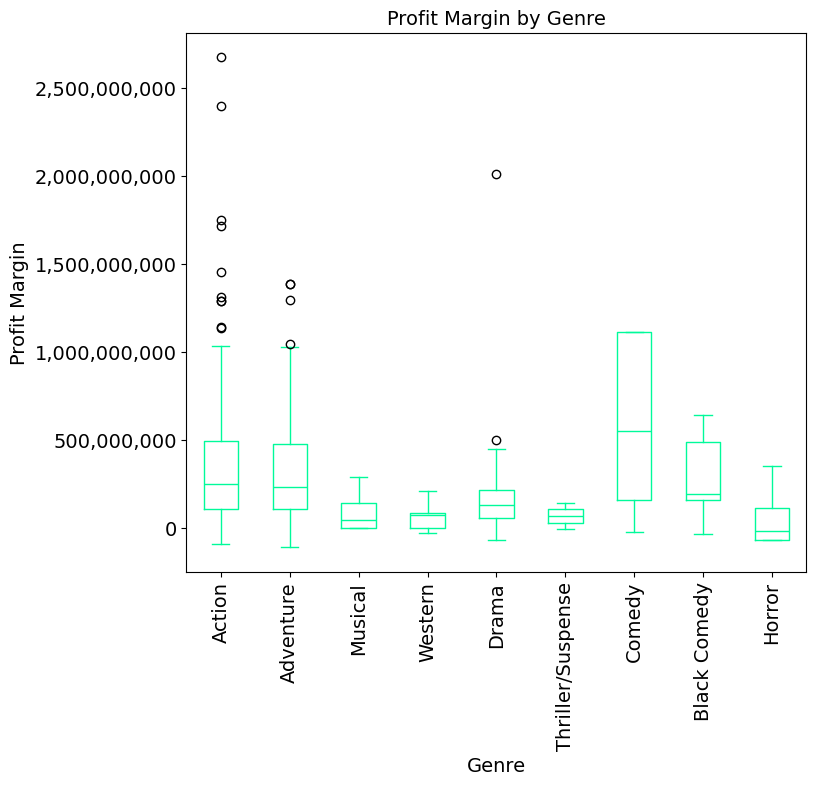

In [18]:
# Create box plot for profit margin by genre
box_plot = profit_margin_df.plot.box(column='Profit Margin', by='Genre', color='mediumspringgreen', figsize=(8,7), fontsize=14)

# Additional chart formatting
plt.xticks(range(1, len(genre_values_unique) + 1), genre_values_unique, rotation=90)
plt.title('Profit Margin by Genre',fontdict={'fontsize':14})
plt.xlabel('Genre',fontdict={'fontsize':14})
plt.ylabel('Profit Margin',fontdict={'fontsize':14})
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))

# Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/profit_margin_by_genre.png",bbox_inches='tight')

# Display chart
plt.show()

In [19]:
# ANOVA Analysis pt.1

# Initialize an empty dictionary to store the groups
groups = {}
unique_genres = profit_margin_df["Genre"].unique()

# Create groups based on the genre
for genre in unique_genres:
    group_name = f"group_{genre}"
    group = profit_margin_df[profit_margin_df["Genre"].apply(lambda x: genre in x)]["Profit Margin"]
    groups[group_name] = group

# Access the groups using the dictionary
for group_name, group_data in groups.items():
    print(f'----------------------------')
    print(f"{group_name}: {group_data}/n")

----------------------------
group_Action: 0      2397800564
2      1030316979
3      1748359754
4       355945209
5       579500760
          ...    
435      64691085
439      70720921
449     310561724
451     272900000
455     212249198
Name: Profit Margin, Length: 181, dtype: int64/n
----------------------------
group_Adventure: 1       666713802
6       118151347
7        19078100
9      1387778651
10     1387778651
          ...    
452     377986200
453      70339667
454     539441092
458     -73482678
459      96861183
Name: Profit Margin, Length: 204, dtype: int64/n
----------------------------
group_Musical: 11      323777242
121     622666425
157    1110042058
158    1110042058
159    1110042058
178    1111788407
179    1111788407
184     481617146
266     218901032
410     -24988743
411     -24988743
417     -24441075
Name: Profit Margin, dtype: int64/n
----------------------------
group_Western: 29      35002115
378    349841566
456    -68088638
457    -68088638
Name: Pro

In [20]:
# ANOVA Analysis pt.2

# Extract profit margin data from the groups
group_data = [group.values for group in groups.values()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*group_data)

# Print the results
print("ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
if f_statistic > 1.938:
    print("The ANOVA test indicates that there are significant differences between the groups.")
else:
    print("The ANOVA test does not show significant differences between the groups.")

ANOVA Results:
F-Statistic: 2.757271244080182
P-Value: 0.005541624444807657
The ANOVA test indicates that there are significant differences between the groups.


## SET NEW NAME FOR DATAFRAME CAPTURING MOVIE_DATA

In [21]:
#Specifying file paths
movie_data = "Resource/movie_clean.csv"

#Reading all data into Pandas
movie_data_df = pd.read_csv(movie_data)

#Print the csv
movie_data_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller",2017-11-13,300000000,655945209,93842239.0,PG-13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
455,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney, Sebastian Koch, Ma...",2013-02-06,92000000,304249198,24834845.0,R,Action
456,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark, Laurence Harvey, ...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
457,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton, Emilio Echev...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
458,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure


## ACTOR VS. WORLDWIDE SALES (A.K.A. GROSS)

In [22]:
# Split the Cast column by commas, take the first two names, and join them back together
movie_data_df['Cast'] = movie_data_df['Cast'].str.split(',').apply(lambda x: ', '.join(x[:2]))

# Check the results to ensure the transformation
#filtered_df = movie_data_df[movie_data_df['Cast'].str.split(',').apply(len) == 2]
# Split the Cast column into two separate columns
movie_data_df[['Actor1', 'Actor2']] = movie_data_df['Cast'].str.split(',', n=1, expand=True)
#filtered_df
movie_data_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre,Actor1,Actor2
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action,Joe Russo,Robert Downey Jr.
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure,Johnny Depp,Penélope Cruz
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action,Robert Downey Jr.,Chris Evans
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action,Joe Russo,Robert Downey Jr.
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot",2017-11-13,300000000,655945209,93842239.0,PG-13,Action,Ben Affleck,Gal Gadot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney",2013-02-06,92000000,304249198,24834845.0,R,Action,Bruce Willis,Jai Courtney
456,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,John Wayne,Richard Widmark
457,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,Dennis Quaid,Billy Bob Thornton
458,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure,Geena Davis,Matthew Modine


In [23]:
# Strip any leading/trailing whitespace from the new columns
movie_data_df['Actor1'] = movie_data_df['Actor1'].str.strip()
movie_data_df['Actor2'] = movie_data_df['Actor2'].str.strip()

# Combine both actor columns into a single column for analysis
exploded_df = movie_data_df.melt(id_vars=[col for col in movie_data_df.columns if col not in ['Actor1', 'Actor2']],
                                 value_vars=['Actor1', 'Actor2'],
                                 value_name='Actor').drop('variable', axis=1)
exploded_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre,Actor
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action,Joe Russo
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure,Johnny Depp
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action,Robert Downey Jr.
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action,Joe Russo
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot",2017-11-13,300000000,655945209,93842239.0,PG-13,Action,Ben Affleck
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney",2013-02-06,92000000,304249198,24834845.0,R,Action,Jai Courtney
916,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,Richard Widmark
917,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,Billy Bob Thornton
918,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure,Matthew Modine


In [24]:
# Calculate the total Worldwide Gross for each actor
actor_sales_df = exploded_df.groupby('Actor')['Worldwide Gross'].sum().reset_index()

# Sort the DataFrame by Worldwide Gross in descending order
actor_sales_df_sorted = actor_sales_df.sort_values(by='Worldwide Gross', ascending=False)

# Display the sorted DataFrame
actor_sales_df_sorted.head(10)

,Actor,Worldwide Gross
427,Robert Downey Jr.,9749979518
251,Joe Russo,6712480728
193,Ian McKellen,5472914902
88,Chris Evans,5365878722
267,Johnny Depp,4956803021
151,Emma Watson,4815411924
312,Leonardo DiCaprio,4775940063
488,Tom Cruise,4624334052
115,Daniel Radcliffe,4420632419
114,Daniel Craig,4303410696


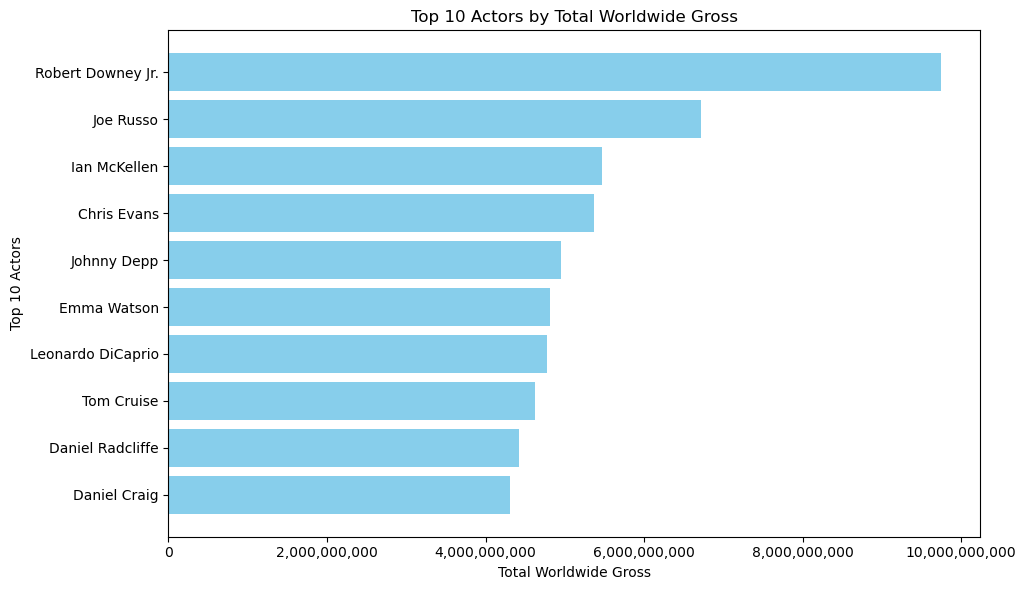

In [25]:
# Top 10 Actors by Total Worldwide Gross - Barh Chart
top_actors = actor_sales_df_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_actors['Actor'], top_actors['Worldwide Gross'], color='skyblue')
plt.xlabel('Total Worldwide Gross')
plt.ylabel('Top 10 Actors')
plt.title('Top 10 Actors by Total Worldwide Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.savefig('movie_analysis_visualizations/actor_vs_worldwide_sales.png')
plt.show()

## MPAA RATING VS. WORLDWIDE SALES

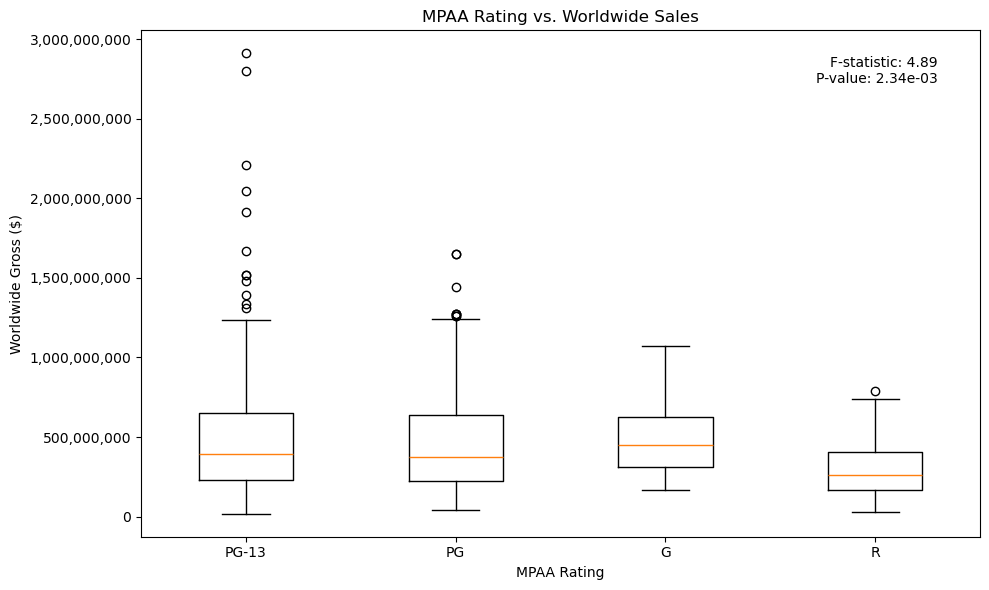

In [26]:
# MPAA Rating vs. Worldwide Sales - Box Plot
plt.figure(figsize=(10, 6))
mpaa_ratings = movie_data_df['MPAA'].unique()
mpaa_data = [movie_data_df[movie_data_df['MPAA'] == rating]['Worldwide Gross'] for rating in mpaa_ratings]
plt.boxplot(mpaa_data, labels=mpaa_ratings)
plt.xlabel('MPAA Rating')
plt.ylabel('Worldwide Gross ($)')
plt.title('MPAA Rating vs. Worldwide Sales')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))

# ANOVA test between multiple MPAA rating groups (G, PG, PG-13, R)
group_g = movie_data_df[movie_data_df['MPAA'] == 'G']['Worldwide Gross'].dropna()
group_pg = movie_data_df[movie_data_df['MPAA'] == 'PG']['Worldwide Gross'].dropna()
group_pg_13 = movie_data_df[movie_data_df['MPAA'] == 'PG-13']['Worldwide Gross'].dropna()
group_r = movie_data_df[movie_data_df['MPAA'] == 'R']['Worldwide Gross'].dropna()
f_stat, p_val = f_oneway(group_g, group_pg, group_pg_13, group_r)

# Simple annotation with F-statistic and p-value
plt.text(0.95, 0.95, f'F-statistic: {f_stat:.2f}\nP-value: {p_val:.2e}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('movie_analysis_visualizations/mpaa_rating_vs_avg_worldwide_sales_bx.png')
plt.show()